# TIM - TP2 : Manipulation d'histogrammes

Pour cette séance, place aux histogrammes ! Comme vous le savez, c'est un outil très utile dans le cadre du pré-traitement des images.

Le but de ce TP est donc de développer quelques algorithmes de prétraitements d'image à partir des histogrammes de ces dernières.

## Correction du TP : préambule

Pour cette correction de TP, je vais vous donner pour chaque algorithme une version minimale attendue (c'est-à-dire ce que j'attends que vous codiez au niveau minimum) et une version optimisée, histoire que vous voyez les différents temps de calcul. Pour cela, j'ai développé une fonction de chronométrage d'une exécution de fonction, affichant ainsi le temps de calcul utilisé. N'hésitez pas à la garder de côté pour vos prochains TP.

In [1]:
# Fonction de chronométrage d'une fonction
import time
def chronometrer(fonction, fonction_name, *args_fonction):
    t_before = time.time()
    output = fonction(*args_fonction)
    t_after = time.time()
    print("Temps d'exécution de {0} : {1:.2f} sec".format(fonction_name,t_after-t_before))
    return output

## Ex. 1 : Commençons par la base...

Commencez déjà par importer les librairies nécessaires pour le TP et définissez le path de votre base d'images.

In [2]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import cv2
path_images = ''

Puis importez l'image Hawke_Bay.jpg en niveaux de gris.

In [3]:
# A COMPLETER
# Importation de l'image Hawke_bay.jpg
hawke_bay = cv2.imread(path_images+'Hawke_Bay.jpg',0)

Vérifiez bien que votre image est chargée en niveaux de gris (c'est-à-dire qu'elle n'a que 2 dimensions).

In [4]:
assert hawke_bay.ndim==2,"L'image chargée n'est pas en niveaux de gris"
print("Tout est ok ;) ")

Tout est ok ;) 


Affichez l'image chargée.

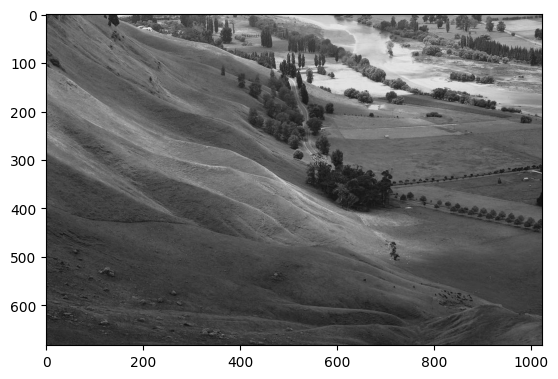

In [5]:
# A COMPLETER
# Affichage de l'image
plt.imshow(hawke_bay,'gray')
plt.show()

**_QUESTION :_** Est-ce que l'affichage de l'image est correct ? (Comparez avec votre image originale dans le dossier). Que remarquez-vous ?

**_REPONSE :_**

Par défaut, lors de **l'affichage d'une image en N&B, la fonction imshow de Matplotlib (Pyplot) normalise les valeurs de l'image**. Cela veut dire que quelques soient les valeurs de l'image, lors de l'affichage, l'image sera modifiée de sorte que le minimum sera à 0 et le maximum à 255. Hors, dans le cadre du traitement d'images, nous voulons afficher les valeurs réelles de l'image en N&B, et spoiler : **ON VOUDRA TOUJOURS AFFICHER UNIQUEMENT LES VALEURS RÉELLES !**

En regardant la documentation de la fonction imshow de matplotlib, trouvez le ou les arguments qui permettront d'afficher l'image telle qu'elle est réellement, sans filtre, à coeur ouvert...

*Note : N'oubliez pas, quel est le type de données de votre image ?*

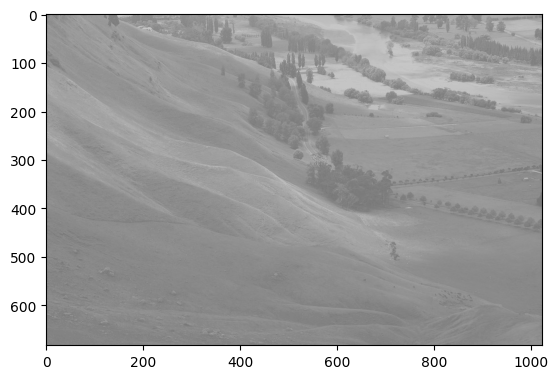

In [6]:
# A COMPLETER
# Affichage de l'image sans normalisation

# Les arguments vmin et vmax définissent les valeurs min et max de l'image. Ici, le type de données est uint8 (entiers codés sur 8 bits)
# Donc on a 256 valeurs possibles, allant de 0 à 255
plt.imshow(hawke_bay,'gray',vmin=0,vmax=255)
plt.show()

Il est temps de tracer votre premier histogramme d'une image. Pour rappel, l'histogramme aura en abscisse les valeurs **possibles** d'une image, et en ordonnée le nombre de pixels de l'image ayant chaque valeur possible de l'image.

Construisez un vecteur qui indiquera, pour chaque valeur possible de l'image, le nombre de pixels ayant la valeur. 

In [7]:
# A COMPLETER
# Construction du vecteur recensant les valeurs de l'image
valeurs_imgs = np.zeros((256),dtype=np.uint64)

# On itère sur les valeurs possibles (ici, 0 à 255)
for i in range(len(valeurs_imgs)):
    # On crée un masque ici qui indique pour chaque pixel si sa valeur est égale à i (True ou False)
    img_with_val = (hawke_bay==i)
    # La somme du masque indique le nombre de pixels de valeurs i
    valeurs_imgs[i] = np.sum(img_with_val)

print(valeurs_imgs)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     1     1    12    19    49    93
   220   488  1061  1747  2160  2718  3259  4039  5108  6395  8463 10610
 13530 16115 19125 22186 25696 28701 28324 25759 24369 23578 21775 20385
 19839 19781 19445 18856 18457 17906 17917 17806 18485 17680 15799 14163
 12812 11576 10751  9899  9380  8863  8399  7404  6

Affichez maintenant le vecteur construit sous forme d'un diagramme en barres.

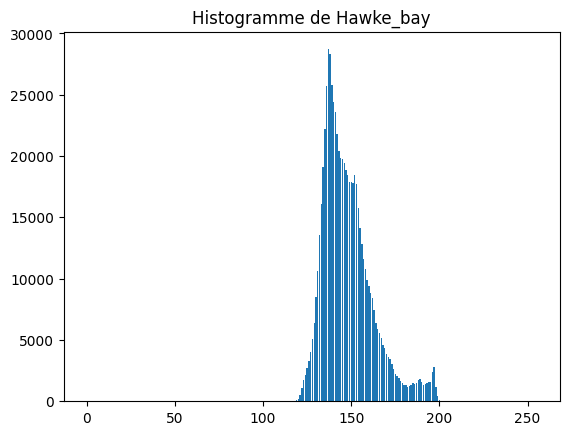

In [8]:
# A COMPLETER
# Affichage de l'histogramme sous forme de diagramme en barres
plt.bar(np.arange(0,256,1),valeurs_imgs)
plt.title('Histogramme de Hawke_bay')
plt.show()

Bravo ! Vous avez affiché votre premier histrogramme ! Sachez maintenant que vous pouvez le faire via la fonction hist de pyplot. Essayez pour voir !

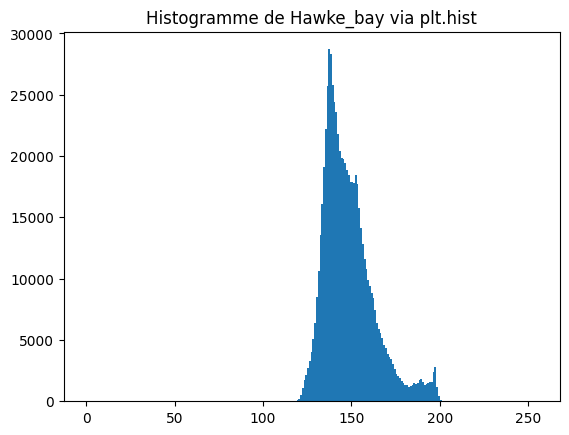

In [9]:
# A COMPLETER
# Tracé de l'histogramme de l'image via plt.hist

plt.hist(hawke_bay.ravel(),bins=range(0,256))
plt.title('Histogramme de Hawke_bay via plt.hist')
plt.show()

---

## Ex 2. : Plein de fonctions sur les histogrammes !!

Le programme pour la suite est simple : vous allez développer plusieurs algorithmes de traitement d'images. Ensuite, vous afficherez les résultats avant et après traitement, ainsi que les histogrammes.

### Binarisation d'images

Le but de la binarisation d’une image est d’affecter un niveau uniforme au pixels pertinents et d´éliminer les autres. C'est une opération assez simple, mais tellement utilisée pour plein de cas concrets.

On va donc l'implémenter en 2 versions : la binarisation par seuillage et la binarisation par extraction d'une fenêtre d'intensité. Il existe d'autres versions de binarisation (binarisation inversée, binarisation avec seuil adaptatif, etc.).

Commencons d'abord par la binarisation par seuillage. Le principe est simple : pour un seuil $a$ défini, la binarisation est une tranformation $t(f)$ où, pour tout pixel f de l'image :
\begin{equation*}
    t(f) =
    \begin{cases}
    0 & \quad \text{si } f<a\\
    255 & \quad \text{sinon}\\
    \end{cases}
\end{equation*}

Ecrivez une fonction qui réalisera la binarisation par seuillage sur l'image chargée, avec un seuil a défini.

In [10]:
# A COMPLETER
# Création de la fonction binarisation par seuillage 

# VERSION MINIMALE
def binarisation(img,a):
    rows,cols = img.shape
    new_img = np.empty((rows,cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if img[i,j]<a:
                new_img[i,j] = 0
            else:
                new_img[i,j] = 255
    return new_img

# VERSION OPTIMISEE
def binarisation_faster(img,a):
    return 255*(img>a)

Testez votre fonction sur l'image test, affichez le résultat et tracez l'histogramme des niveaux de gris de l'image après binarisation par seuillage.

Temps d'exécution de Binarisation par seuillage avec boucles : 0.64 sec
Temps d'exécution de Binarisation par seuillage sans boucles : 0.00 sec


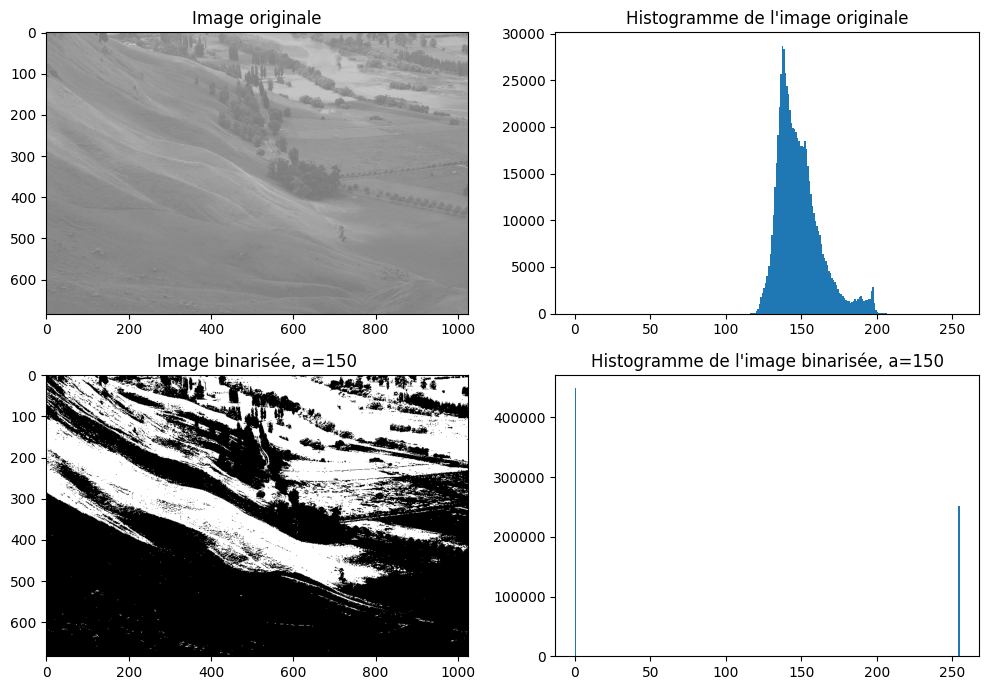

In [11]:
# A COMPLETER

# Définition du seuil
a_binarisation = 150

# Binarisation de l'image
hawke_bin = chronometrer(binarisation,"Binarisation par seuillage avec boucles",hawke_bay,a_binarisation)
hawke_bin_faster = chronometrer(binarisation_faster,"Binarisation par seuillage sans boucles",hawke_bay,a_binarisation)


# Affichage de l'image originale et du résultat après binarisation avec le seuil a, ainsi que leurs histogrammes
plt.subplots(2,2,figsize=(10,7))

plt.subplot(221)
plt.imshow(hawke_bay,'gray',vmin=0,vmax=255)
plt.title("Image originale")

plt.subplot(222)
plt.hist(hawke_bay.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image originale")

plt.subplot(223)
plt.imshow(hawke_bin_faster,'gray',vmin=0,vmax=255)
plt.title(f"Image binarisée, a={a_binarisation}")

plt.subplot(224)
plt.hist(hawke_bin_faster.ravel(),bins=range(0,256))
plt.title(f"Histogramme de l'image binarisée, a={a_binarisation}")

plt.tight_layout()

plt.show()

Passons à la binarisation par extraction de fenêtre d'intensité. Le principe est similaire à la binarisation par seuillage : pour 2 seuils a et définis, $a<b$, la binarisation est une tranformation $t(f)$ où, pour tout pixel f de l'image :
\begin{equation*}
    t(f) = 
    \begin{cases}
    f & \quad \text{si } a\leq f \leq b\\
    0 & \quad \text{sinon}\\
    \end{cases}
\end{equation*}

Ecrivez une fonction qui réalisera la binarisation par extraction de fenêtre d'intensité sur l'image chargée, avec les seuil a et b définis.

In [12]:
# A COMPLETER
# Création de la fonction binarisation par extraction d'une fenêtre d'intensité

# VERSION MINIMALE
def binarisation_fenetre(img,a,b):
    rows,cols = img.shape
    new_img = np.empty((rows,cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if img[i,j]<a or img[i,j]>b:
                new_img[i,j] = 0
            else:
                new_img[i,j] = img[i,j]
    return new_img

# VERSION OPTIMISEE
def binarisation_fenetre_faster(img,a,b):
    return img*(a<=img)*(img<=b)

Temps d'exécution de Binarisation par extraction de fenêtre d'intensité avec boucles : 0.91 sec
Temps d'exécution de Binarisation par extraction de fenêtre d'intensité sans boucles : 0.00 sec


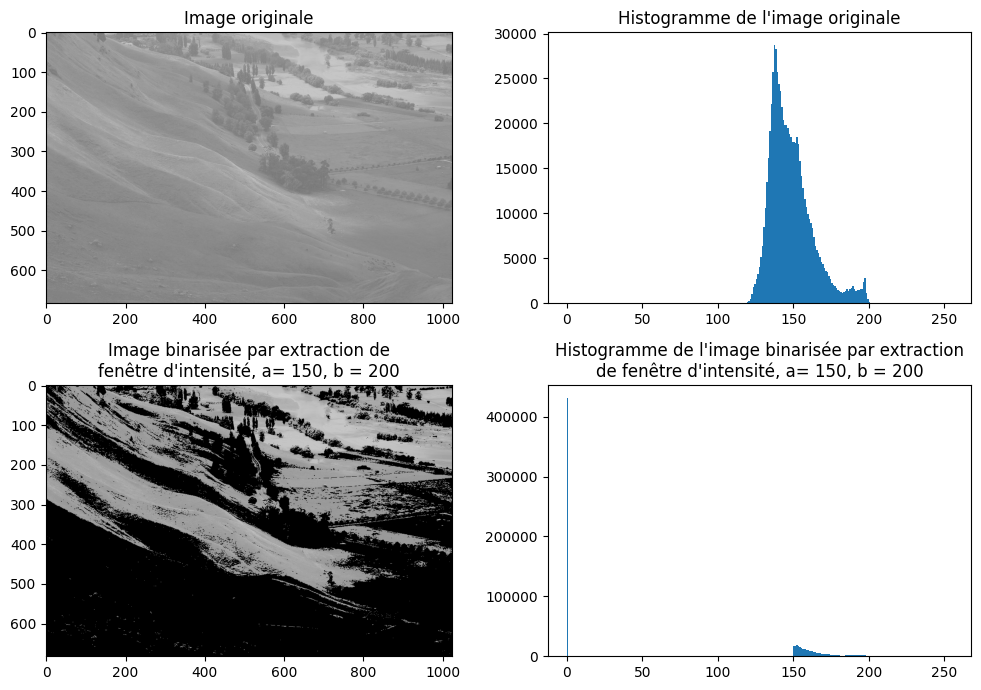

In [13]:
# A COMPLETER

# Définition des seuils
a_bin_fenetre = 150
b_bin_fenetre = 200

# Binarisation par extraction de fenêtre de l'image
hawke_bin_fenetre = chronometrer(binarisation_fenetre,"Binarisation par extraction de fenêtre d'intensité avec boucles",hawke_bay,a_bin_fenetre,b_bin_fenetre)
hawke_bin_fenetre_faster = chronometrer(binarisation_fenetre_faster,"Binarisation par extraction de fenêtre d'intensité sans boucles",hawke_bay,a_bin_fenetre,b_bin_fenetre)

# Affichage de l'image originale et du résultat après binarisation par extraction de fenetre, ainsi que leurs histogrammes
plt.subplots(2,2,figsize=(10,7))

plt.subplot(221)
plt.imshow(hawke_bay,'gray',vmin=0,vmax=255)
plt.title("Image originale")

plt.subplot(222)
plt.hist(hawke_bay.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image originale")

plt.subplot(223)
plt.imshow(hawke_bin_fenetre_faster,'gray',vmin=0,vmax=255)
plt.title(f"Image binarisée par extraction de\nfenêtre d'intensité, a= {a_bin_fenetre}, b = {b_bin_fenetre}")

plt.subplot(224)
plt.hist(hawke_bin_fenetre_faster.ravel(),bins=range(0,256))
plt.title(f"Histogramme de l'image binarisée par extraction\nde fenêtre d'intensité, a= {a_bin_fenetre}, b = {b_bin_fenetre}")

plt.tight_layout()

plt.show()

### Expansion de la dynamique

L'expansion de la dynamique est une transformation $t(f)$ qui permet de modifier la dynamique des niveaux de gris dans le but d'améliorer l'aspect visuel de l'image. Pour deux seuils $a$ et $b$ définis, $a<b$, la transformation d'un pixel f de l'image est définie de la manière suivante :
\begin{equation*}
    t(f) = 
    \begin{cases}
    0 & \quad \text{si } f<a\\
    255 & \quad \text{si } f>b\\
    255 \times \frac{f-a}{b-a} & \quad \text{sinon}\\
    \end{cases}
\end{equation*}



**_QUESTION :_** Dans cette fonction, que signifient $a$ et $b$ ?

**_REPONSE :_** La fonction d'expansion de la dynamique étire la range des pixels de l'image tel que les valeurs de l'image inférieures ou égales à $a$ passent à 0 après transformation, et les valeurs de l'image supérieures ou égales à $b$ passent à 255 après transformation. La range entre $a$ et $b$ est étirée de 0 à 255 linéairement. C'est comme si on étirait l'histogramme entre $a$ et $b$ pour les faire passer entre 0 et 255.

Définissez vos seuils a et b et créez une fonction qui réalisera l'expansion de la dynamique sur l'image chargée. Affichez l'image originale, celle-ci après l'expansion de la dynamique, et leurs histogrammes correspondants.

In [14]:
# A COMPLETER
# Création de la fonction expansion de la dynamique

# VERSION MINIMALE
def exp_dyn(img,a,b):
    rows,cols = img.shape
    new_img = np.empty((rows,cols),dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if img[i,j]<a:
                new_img[i,j]=0
            elif img[i,j]>b:
                new_img[i,j]=255
            else:
                new_img[i,j]=255*((img[i,j]-a)/(b-a))
    return new_img

# VERSION OPTIMISEE
def exp_dyn_faster(img,a,b):
    return np.floor(255*np.clip((img.astype(np.int16)-a)/(b-a),0,1))

Temps d'exécution de Expansion de la dynamique (version minimale) : 1.43 sec
Temps d'exécution de Expansion de la dynamique (version optimisée) : 0.00 sec


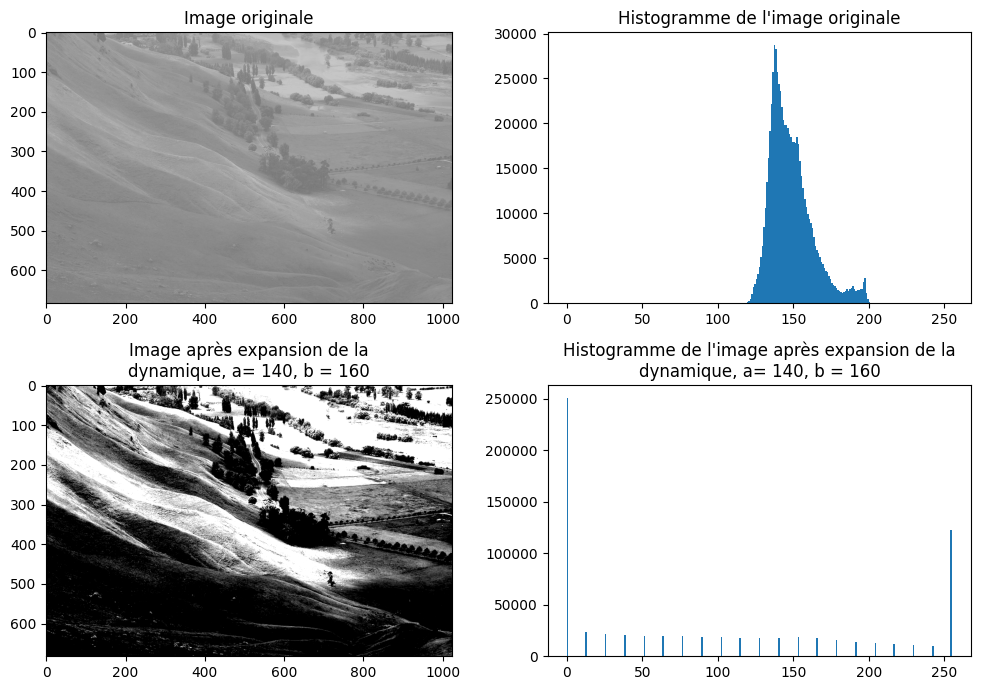

In [15]:
# A COMPLETER

# Définition des seuils
a_exp_dyn = 140
b_exp_dyn = 160

# Expansion dynamique de l'image aux seuils a et b
hawke_exp_dyn = chronometrer(exp_dyn,"Expansion de la dynamique (version minimale)",hawke_bay,a_exp_dyn,b_exp_dyn)
hawke_exp_dyn_faster = chronometrer(exp_dyn_faster,"Expansion de la dynamique (version optimisée)",hawke_bay,a_exp_dyn,b_exp_dyn)

# Affichage de l'image originale et du résultat après expansion de la dynamique, et leurs histogrammes
plt.subplots(2,2,figsize=(10,7))

plt.subplot(221)
plt.imshow(hawke_bay,'gray',vmin=0,vmax=255)
plt.title("Image originale")

plt.subplot(222)
plt.hist(hawke_bay.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image originale")

plt.subplot(223)
plt.imshow(hawke_exp_dyn_faster,'gray',vmin=0,vmax=255)
plt.title(f"Image après expansion de la\ndynamique, a= {a_exp_dyn}, b = {b_exp_dyn}")

plt.subplot(224)
plt.hist(hawke_exp_dyn_faster.ravel(),bins=range(0,256))
plt.title(f"Histogramme de l'image après expansion de la\ndynamique, a= {a_exp_dyn}, b = {b_exp_dyn}")

plt.tight_layout()

plt.show()

### Rehaussement de contraste

Le réhaussement de contraste est une transformation du même type que l'expansion de la dynamique, à savoir la modification des niveaux de gris dans le but d'améliorer l'aspect visuel de l'image. Pour deux seuils a et b définis, la transformation d'un pixel f de l'image est définie de la manière suivante :
\begin{equation*}
    t(f) = 
    \begin{cases}
    \frac{b}{a}f & \quad \text{si } 0 \leq f \leq a\\
    \frac{(255-b)f+255(b-a)}{255-a} & \quad \text{si } a \leq f \leq 255\\
    \end{cases}
\end{equation*}



**_QUESTION :_** Dans cette fonction, que signifient $a$ et $b$ ? Quelle est la relation entre ces deux seuils ? Que se passe-t-il lorsque $a<b$ ? Et lorsque $a>b$ ?

**_REPONSE :_** La fonction de rehaussement de contraste permet d'améliorer la perception visuelle de l'image en accentuant des détails sombres ou lumineux, selon les seuils. Dans le cas de cette fonction, les seuils $a$ et $b$ sont définis de sorte que $t(a) = b$. De ce fait, lorsque $a<b$, le rehaussement de contraste va accentuer les détails lumineux, mais atténuera en revanche les pixels sombres. A l'inverse, lorsque $a>b$, le rehaussement de contraste va accentuer les détails sombres, mais atténuera les pixels lumineux.

Définissez vos seuils a et b et créez une fonction qui réalisera le réhaussement de contraste sur l'image chargée. Affichez l'image originale, celle-ci après rehaussement de contraste, et leurs histogrammes correspondants.

In [16]:
# A COMPLETER
# Création de la fonction réhaussement de contraste

# VERSION MINIMALE
def reh_const(img,a,b):
    img_copy = img.astype(np.int16)
    rows,cols = img.shape
    new_img = np.empty((rows,cols),dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if img[i,j]<=a:
                new_img[i,j]=img_copy[i,j]*b//a
            else:
                new_img[i,j]=(((255-b)*img_copy[i,j]+255*(b-a))//(255-a)).astype(np.uint8)
    return new_img

# VERSION OPTIMISEE
def reh_const_faster(img,a,b):
    img = img.astype(np.int16)
    new_img = np.empty(img.shape)
    new_img[img<=a]=img[img<=a]*b/a
    new_img[img>a]=((255-b)*img[img>a]+255*(b-a))/(255-a)
    return np.floor(new_img).astype(np.uint8)

Temps d'exécution de Rehaussement de contraste (version minimale) : 1.35 sec
Temps d'exécution de Rehaussement de contraste (version optimisée) : 0.00 sec


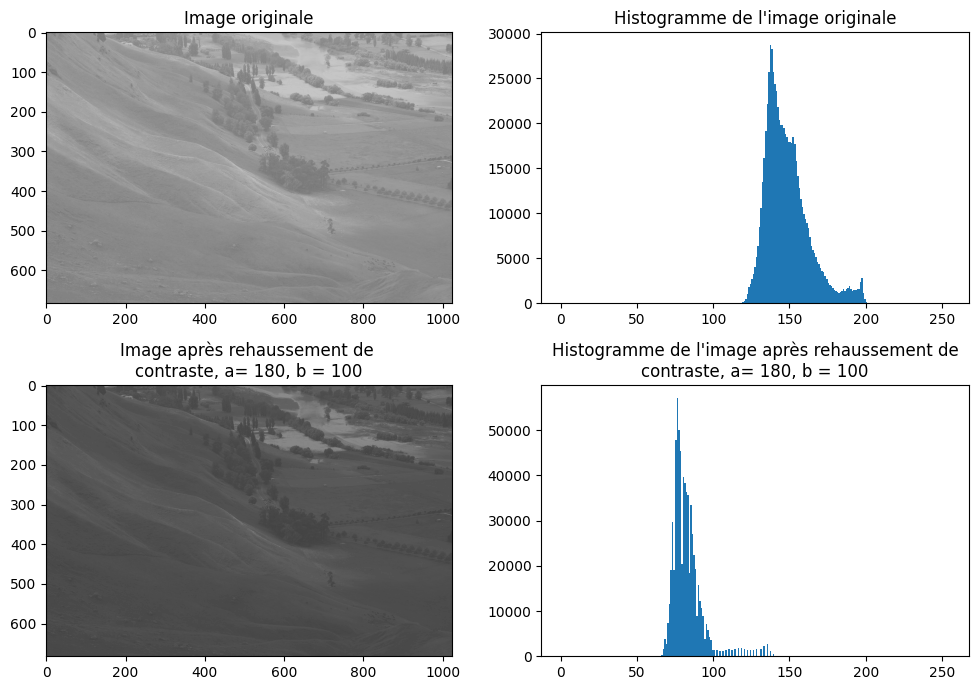

In [17]:
# A COMPLETER

# Définition des seuils
a_reh_const = 180
b_reh_const = 100

# Réhaussement de contraste de l'image aux seuils a et b
hawke_reh_const = chronometrer(reh_const, "Rehaussement de contraste (version minimale)",hawke_bay,a_reh_const,b_reh_const)
hawke_reh_const_faster = chronometrer(reh_const_faster, "Rehaussement de contraste (version optimisée)",hawke_bay,a_reh_const,b_reh_const)

# Affichage de l'image originale et du résultat après réhaussement de contraste, et leurs histogrammes
plt.subplots(2,2,figsize=(10,7))

plt.subplot(221)
plt.imshow(hawke_bay,'gray',vmin=0,vmax=255)
plt.title("Image originale")

plt.subplot(222)
plt.hist(hawke_bay.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image originale")

plt.subplot(223)
plt.imshow(hawke_reh_const_faster,'gray',vmin=0,vmax=255)
plt.title(f"Image après rehaussement de \ncontraste, a= {a_reh_const}, b = {b_reh_const}")

plt.subplot(224)
plt.hist(hawke_reh_const_faster.ravel(),bins=range(0,256))
plt.title(f"Histogramme de l'image après rehaussement de\ncontraste, a= {a_reh_const}, b = {b_reh_const}")

plt.tight_layout()

plt.show()

### Egalisation d'histogramme

Un dernier algorithme pour cet exercice : l'égalisation d'histogramme. Comme pour les algorithmes précédents, l'égalisation d'histogramme est une transformation *t(f)* qui a pour objectif de :
* rendre l’histogramme le plus plat possible ;
* distribuer uniformément des niveaux de gris ;
* maximiser l’entropie de l’image ;
* obtenir une image ayant une information maximale.

D'un point de vue du domaine discret, la transformation est définie par :
\begin{equation*}
t(f) = \frac{L-1}{N} \sum_{i=0}^{f} h(i)
\end{equation*}
où L est le nombre de niveaux de gris dont l'image est codée (l'image est en uint8), N le nombre total de pixels de l'image, et h l'histogramme des niveaux de gris de l'image.
Donc $\sum_{i=0}^{f} h(i)$ correspond à l'histogramme cumulé à la valeur f.

Commencez d'abord par écrire une fonction qui à partir de l'image, retourne un vecteur correspondant à l'histogramme cumulé des niveaux de gris de cette dernière.

In [18]:
# A COMPLETER
# Fonction de calcul de l'histogramme cumulé des niveaux de gris
def histo_cum(image):
    
    # Cette fonction recense les valeurs des pixels de l'image, retournant un vecteur unique (les valeurs de l'image) et un vecteur counts (le nombre de pixels ayant chaque valeur)
    unique,counts = np.unique(image,return_counts=True)
    
    # On met les résultats obtenus dans un vecteur de taille 256, permettant ainsi de recenser également les valeurs possibles de l'image, mais non présent dans l'image (count = 0)
    output = np.zeros(256)
    output[unique]=counts
    
    # On retourne la somme cumulée du vecteur (vecteur de même taille que output)
    return np.cumsum(output)

Ecrivez maintenant la fonction d'équalisation d'histogramme d'une image.

In [19]:
# VERSION MINIMALE
def equal_hist(image):
    L = 256
    rows, cols = image.shape
    N = rows*cols
    new_img = np.empty((rows,cols),dtype=np.uint8)
    h = histo_cum(image)
    for i in range(rows):
        for j in range(cols):
            new_img[i,j] = int(((L-1)/N)*h[image[i,j]])
    return new_img

# VERSION OPTIMISEE
def equal_hist_faster(image):
    L = 256
    rows,cols = image.shape
    N = rows*cols
    return np.floor(((L-1)/N)*histo_cum(image)[image]).astype(np.uint8)

Affichez l'image originale, celle-ci après égalisation d'histogramme, et leurs histogrammes correspondants.

Temps d'exécution de Egalisation d'histogramme : 0.17 sec
Temps d'exécution de Egalisation d'histogramme : 0.01 sec


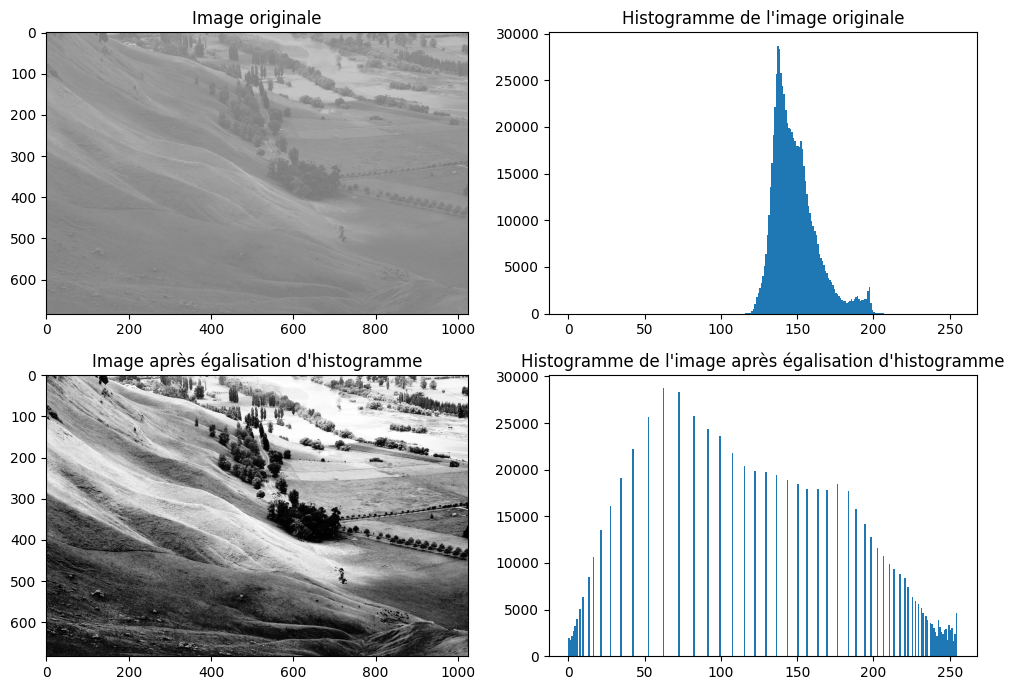

In [20]:
# A COMPLETER
# Egalisation d'histogramme de l'image
hawke_equal = chronometrer(equal_hist, "Egalisation d'histogramme", hawke_bay)
hawke_equal_faster = chronometrer(equal_hist_faster, "Egalisation d'histogramme", hawke_bay)

# Affichage de l'image originale et du résultat après égalisation d'histogramme, et leurs histogrammes
plt.subplots(2,2,figsize=(10,7))

plt.subplot(221)
plt.imshow(hawke_bay,'gray',vmin=0,vmax=255)
plt.title("Image originale")

plt.subplot(222)
plt.hist(hawke_bay.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image originale")

plt.subplot(223)
plt.imshow(hawke_equal_faster,'gray',vmin=0,vmax=255)
plt.title(f"Image après égalisation d'histogramme")

plt.subplot(224)
plt.hist(hawke_equal_faster.ravel(),bins=range(0,256))
plt.title(f"Histogramme de l'image après égalisation d'histogramme")

plt.tight_layout()

plt.show()

---
## Ex 3. : Et si on voyait les choses autrement...

Si vous en êtes là, c'est que vous avez réussi à coder les 5 premiers algorithmes. Mais la vérité est que ces 5 algorithmes peuvent être simplifiés (Emoji choqué).

En effet, toutes ces transformations sont dites globales (elles s'appliquent uniformément sur toute l'image, contrairement à des transformations locales). Cela veut dire que pour un pixel de valeur $x$ dans mon image, qui après transformation aura une valeur $y$, tous les autres pixels de l'image de valeur $x$ initialement auront une valeur $y$ après transformation. 

De ce fait, au lieu de traiter les pixels un par un dans notre image, on peut préalablement construire une LUT (Look-Up Table, ou Table de correspondance), qui est sous la forme d'un vecteur de taille 256. A chaque indice $x$, la table donne la valeur $y$ que tous les pixels $x$ auront après transformation.

Dans cet exercice, nous allons simplifier tous nos précédents algorithmes en construisant une LUT par transformation, puis en utilisant une seule fonction qui appliquera la transformation de la LUT sur l'image.

Dans un premier temps, construisez la LUT de la fonction de binarisation par seuil. La fonction prendra en entrée $M$, la taille de la LUT (nombre de valeurs possibles de l'image), et $a$, le seuil de binarisation, et renverra un vecteur de taille $N$ indiquant à chaque indice du vecteur la valeur des pixels correspondants après binarisation (donc 0 ou 255).

In [21]:
# A COMPLETER
# Fonction de création de la LUT pour une binarisation par seuil

def create_LUT_binarisation(M,a):
    LUT = np.zeros((M),dtype=np.uint8)
    LUT[a:]=255
    return LUT

Tracez maintenant la LUT sous forme de courbe.

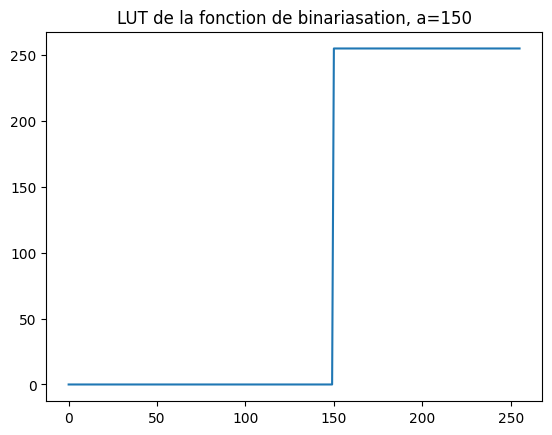

In [22]:
# A COMPLETER
# Tracé de la LUT
M=256
a=150
LUT_bin = create_LUT_binarisation(M,a)
plt.plot(np.arange(256),LUT_bin)
plt.title(f"LUT de la fonction de binariasation, a={a}")
plt.show()

Développez maintenant une fonction qui applique une LUT sur une image.

In [23]:
# A COMPLETER
# Fonction d'application d'une LUT sur une image

# VERSION MINIMALE
def apply_LUT(image,LUT):
    rows,cols = image.shape
    new_img = np.empty((rows,cols),dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            new_img[i,j] = LUT[image[i,j]]
    return new_img

# VERSION OPTIMISEE
def apply_LUT_faster(image,LUT):
    return LUT[image]

Appliquez maintenant la LUT de binarisation avec le même seuil utilisé auparavant sur votre image test, et affichez le résultat ainsi que l'histogramme. Comparez le résultat avec votre précédente fonction de binarisation.

Temps d'exécution de Binarisation par LUT (version minimale) : 0.10 sec
Temps d'exécution de Binarisation par LUT (version optimisée) : 0.00 sec


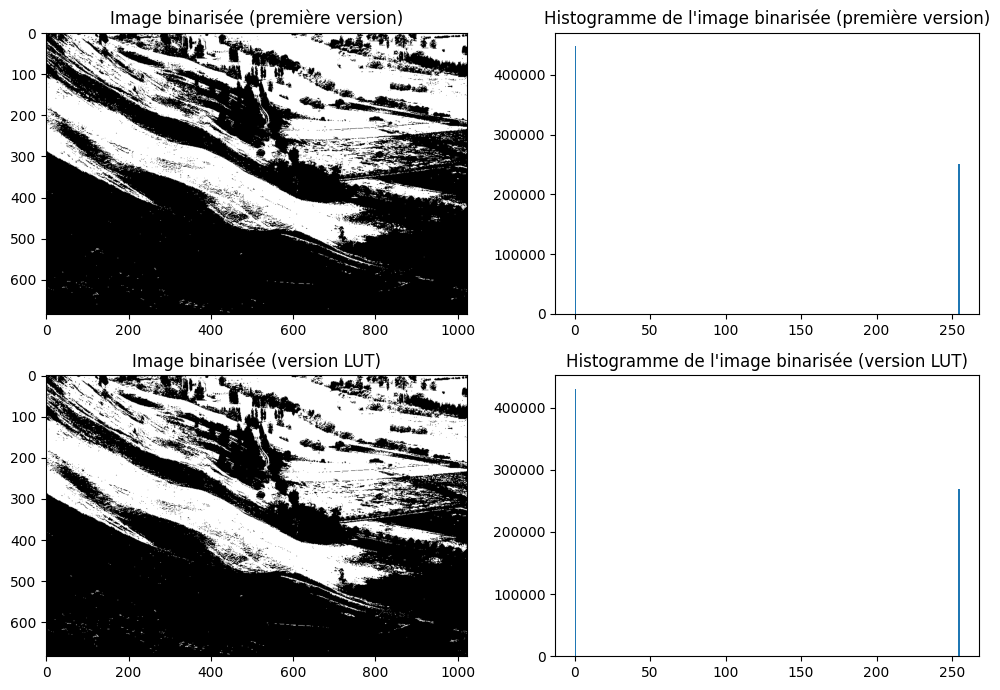

In [24]:
# A COMPLETER
# Aplication de la LUT de binarisation sur l'image
hawke_bin_LUT = chronometrer(apply_LUT,"Binarisation par LUT (version minimale)",hawke_bay,LUT_bin)
hawke_bin_LUT_faster = chronometrer(apply_LUT_faster,"Binarisation par LUT (version optimisée)",hawke_bay,LUT_bin)

# Affichage des images binarisées par les deux méthodes, ainsi que leurs histogrammes
plt.subplots(2,2,figsize=(10,7))

plt.subplot(221)
plt.imshow(hawke_bin_faster,'gray',vmin=0,vmax=255)
plt.title("Image binarisée (première version)")

plt.subplot(222)
plt.hist(hawke_bin_faster.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image binarisée (première version)")

plt.subplot(223)
plt.imshow(hawke_bin_LUT_faster,'gray',vmin=0,vmax=255)
plt.title(f"Image binarisée (version LUT)")

plt.subplot(224)
plt.hist(hawke_bin_LUT_faster.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image binarisée (version LUT)")

plt.tight_layout()

plt.show()

**_REPONSE :_** On obtient le même résultat.

Reprenez les fonctions de binarisation par extraction de fenêtre d'intensité, expansion de la dynamique, rehaussement de contraste et égalisation d'histogrammes sous forme de création de LUT, et tracez les courbes correspondantes aux transformations.

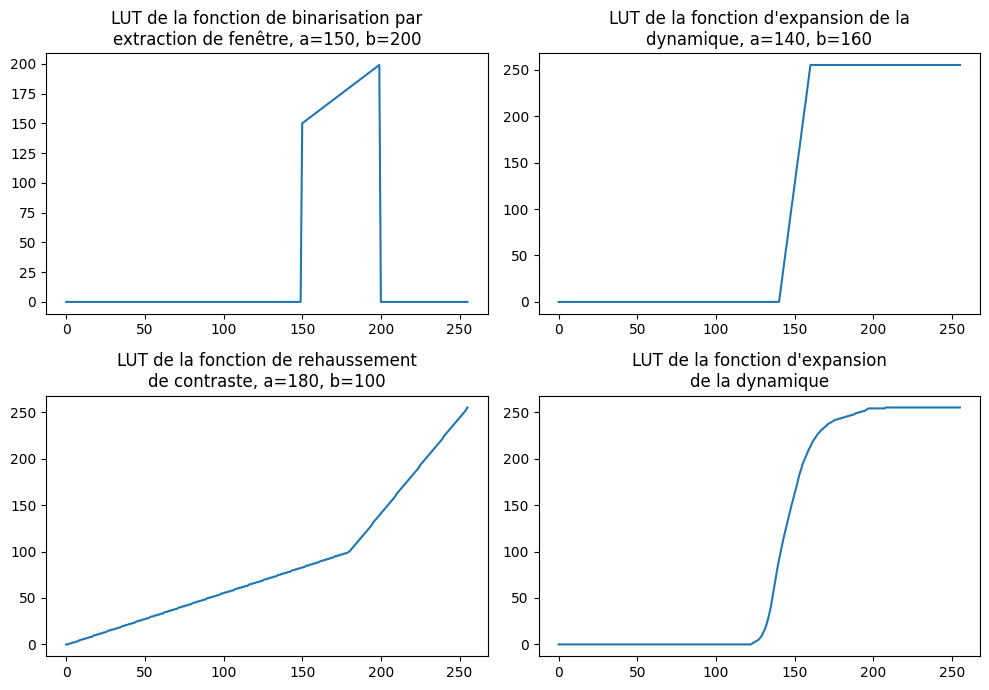

In [25]:
# A COMPLETER
# Fonctions de créations de LUT des précédents algorithmes

def create_LUT_binarisation_fenetre(M,a,b):
    LUT = np.arange(M,dtype=np.uint8)
    LUT[:a]=0
    LUT[b:]=0
    return LUT

def create_LUT_exp_dyn(M,a,b):
    LUT = 255*(np.arange(M)-a)/(b-a)
    LUT[:a]=0
    LUT[b:]=255
    return LUT.astype(np.uint8)

def create_LUT_reh_con(M,a,b):
    LUT = np.arange(M,dtype=np.uint64)
    LUT[:a] = LUT[:a]*b/a
    LUT[a:] = ((255-b)*LUT[a:]+255*(b-a))/(255-a)
    return LUT.astype(np.uint8)

def create_LUT_equal_hist(image,M):
    rows,cols = image.shape
    N=rows*cols
    return (((M-1)/N)*histo_cum(image)).astype(np.uint8)

# Tracé des courbes de LUT
M=256
LUT_bin_fenetre = create_LUT_binarisation_fenetre(M,a_bin_fenetre,b_bin_fenetre)
LUT_exp_dyn = create_LUT_exp_dyn(M,a_exp_dyn,b_exp_dyn)
LUT_reh_const = create_LUT_reh_con(M,a_reh_const,b_reh_const)
LUT_equal_hist = create_LUT_equal_hist(hawke_bay,M)

plt.subplots(2,2,figsize=(10,7))

plt.subplot(221)
plt.plot(np.arange(256),LUT_bin_fenetre)
plt.title(f"LUT de la fonction de binarisation par\nextraction de fenêtre, a={a_bin_fenetre}, b={b_bin_fenetre}")

plt.subplot(222)
plt.plot(np.arange(256),LUT_exp_dyn)
plt.title(f"LUT de la fonction d'expansion de la\ndynamique, a={a_exp_dyn}, b={b_exp_dyn}")

plt.subplot(223)
plt.plot(np.arange(256),LUT_reh_const)
plt.title(f"LUT de la fonction de rehaussement\nde contraste, a={a_reh_const}, b={b_reh_const}")

plt.subplot(224)
plt.plot(np.arange(256),LUT_equal_hist)
plt.title(f"LUT de la fonction d'expansion\nde la dynamique")

plt.tight_layout()
plt.show()

Appliquez maintenant chaque LUT sur votre image test et voyez si vous obtenez le même résultat que précédemment.

Temps d'exécution de Binarisation par extraction de fenêtre LUT (version optimisée) : 0.00 sec
Temps d'exécution de Expansion de la dynamique LUT (version optimisée) : 0.00 sec
Temps d'exécution de Rehaussement de contraste LUT (version optimisée) : 0.00 sec
Temps d'exécution de Egalisation d'histogramme LUT (version optimisée) : 0.00 sec


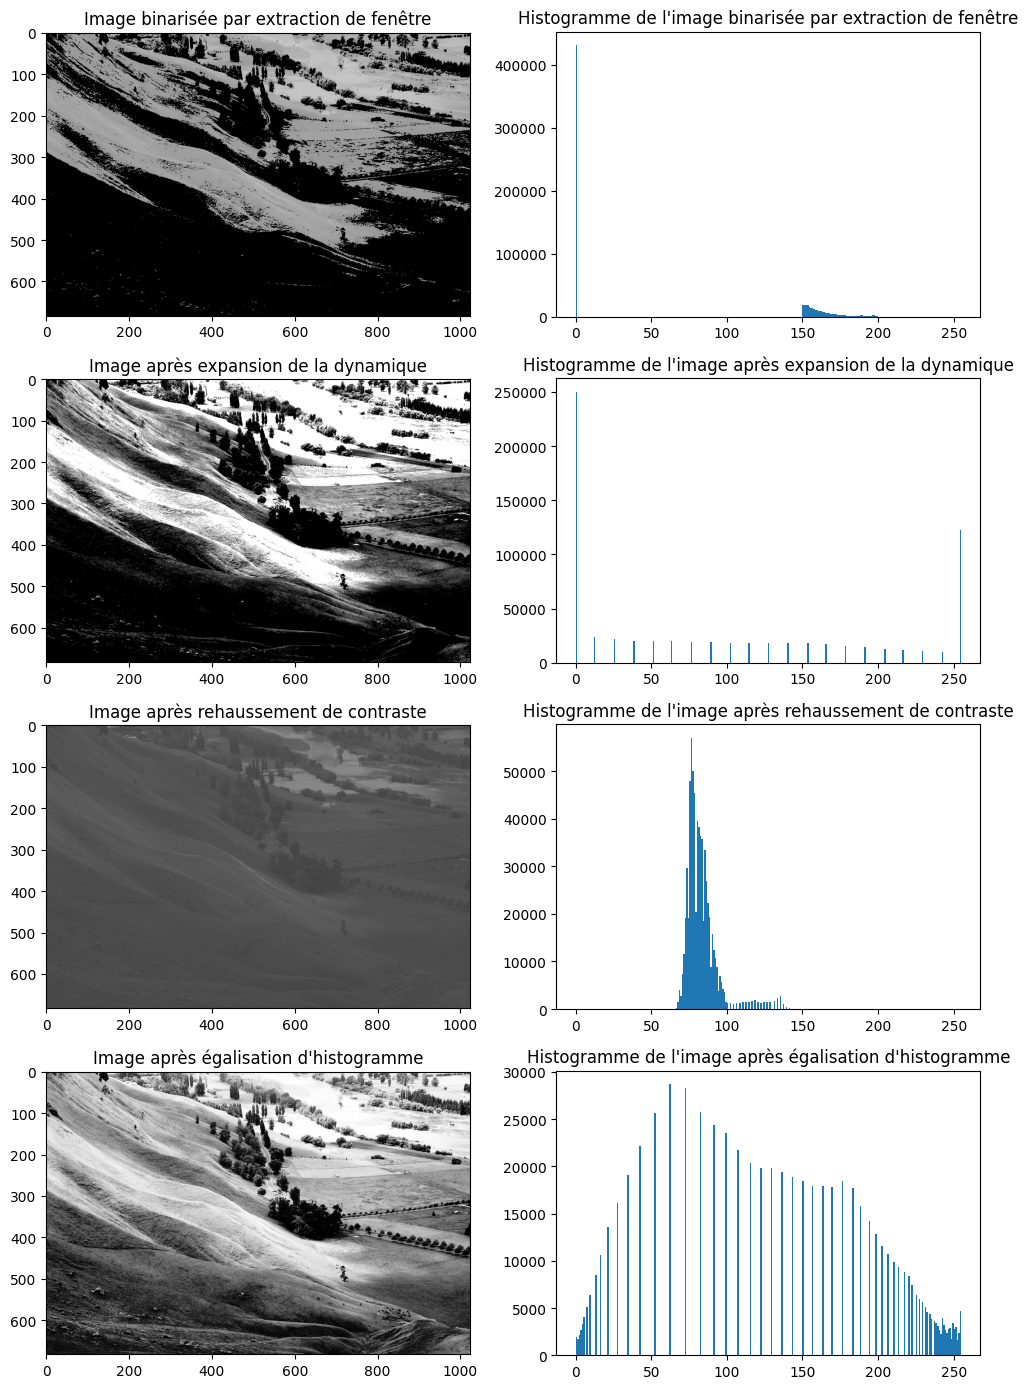

In [26]:
# A COMPLETER
# Application des LUT des précédents algorithmes sur l'image test
hawke_bin_fen_LUT = chronometrer(apply_LUT_faster,"Binarisation par extraction de fenêtre LUT (version optimisée)",hawke_bay,LUT_bin_fenetre)
hawke_exp_dyn_LUT = chronometrer(apply_LUT_faster,"Expansion de la dynamique LUT (version optimisée)",hawke_bay,LUT_exp_dyn)
hawke_reh_con_LUT = chronometrer(apply_LUT_faster,"Rehaussement de contraste LUT (version optimisée)",hawke_bay,LUT_reh_const)
hawke_equal_hist_LUT = chronometrer(apply_LUT_faster,"Egalisation d'histogramme LUT (version optimisée)",hawke_bay,LUT_equal_hist)

# Affichage des images et histogrammes après applications des LUT
plt.subplots(4,2,figsize=(10,14))

plt.subplot(421)
plt.imshow(hawke_bin_fen_LUT,'gray',vmin=0,vmax=255)
plt.title("Image binarisée par extraction de fenêtre")

plt.subplot(422)
plt.hist(hawke_bin_fen_LUT.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image binarisée par extraction de fenêtre")

plt.subplot(423)
plt.imshow(hawke_exp_dyn_LUT,'gray',vmin=0,vmax=255)
plt.title(f"Image après expansion de la dynamique")

plt.subplot(424)
plt.hist(hawke_exp_dyn_LUT.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image après expansion de la dynamique")

plt.subplot(425)
plt.imshow(hawke_reh_con_LUT,'gray',vmin=0,vmax=255)
plt.title(f"Image après rehaussement de contraste")

plt.subplot(426)
plt.hist(hawke_reh_con_LUT.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image après rehaussement de contraste")

plt.subplot(427)
plt.imshow(hawke_equal_hist_LUT,'gray',vmin=0,vmax=255)
plt.title(f"Image après égalisation d'histogramme")

plt.subplot(428)
plt.hist(hawke_equal_hist_LUT.ravel(),bins=range(0,256))
plt.title("Histogramme de l'image après égalisation d'histogramme")

plt.tight_layout()

plt.show()

*Ok, cool, on obtient les mêmes résultats, mais alors, à quoi ça sert tout ça ?*

L'utilisation de LUT a plusieurs avantages. Tout d'abord, c'est générique. Cela veut dire qu'on peut réaliser une grande quantité d'algorithmes juste avec cet outil. Il suffit de concevoir la LUT, et ensuite à l'appliquer. 

Ensuite, si on souhaite appliquer plusieurs LUT à la suite (par exemple une égalisation d'histogrammes puis une binarisation), il suffit de créer une LUT unique et modifier par conséquent les pixels de l'image une seule fois. On manipule uniquement un vecteur, ce qui est moins coûteux en ressources. Je pourrais vous demander de le faire, mais ce TP est déjà ASSEZ long comme ça.

Enfin, ça ouvre la possibilité à d'autres algorithmes plus compliqués à faire, qui demanderait plus de ressources, ce qui rend la LUT à la fois simple, pratique mais également moins coûteuse en ressources. Un exemple avec le dernier exercice.

---

## Ex 4. : Nouveau look pour une nouvelle vie

Dans cette dernière partie, vous aurez juste une ligne de code à remplir, c'est avant tout une démonstration de ce qu'on peut faire juste avec des histogrammes.

En tant qu'expert de la mode, je peux vous dire que le style est important. C'est le cas également en traitement d'images. Lorsque vous avez une photo banale, vous pouvez, grâce à un transfert de style, la rendre beaucoup plus attrayante. Pour ce faire, nous allons faire un matching d'histogrammes. Le principe est simple : vous avez une image source, à styliser, et une image référence, dont vous souhaitez prendre le style. L'algorithme va analyser les deux histogrammes cumulés des images et va trouver une LUT qui permet de modifier l'histogramme de l'image source pour qu'elle colle au mieux à celui de l'image référence.

Le code ci-dessous crée la LUT pour le matching d'histogramme d'une source pour coller au style d'une référence.

In [27]:
def compute_cdf(image):
    """
    Calcule la Cumulative Distribution Function (histogramme cumulé normalisé) d'une image
    """
    hist, _ = np.histogram(image.ravel(), bins=256, range=(0, 256))
    cdf = hist.cumsum().astype(np.float64)
    total = cdf[-1] if cdf[-1] > 0 else 1.0
    return cdf / total

def create_LUT_matching(source_gray, reference_gray):
    """
    Fonction de création de la LUT pour le matching d'histogrammes de source vers reference
    """

    cdf_s = compute_cdf(source_gray)
    cdf_t = compute_cdf(reference_gray)

    # Inverse approx. de F_t via interpolation linéaire sur les niveaux 0..255
    inv_t = np.interp(cdf_s, cdf_t, np.arange(256))

    return np.clip(np.round(inv_t), 0, 255).astype(np.uint8)

Ensuite, le code ci-dessous (à compléter) réalise le matching d'histogrammes. Complétez la ligne manquante en insérant votre fonction d'application de LUT.

In [28]:
def histogram_match(source, reference):
    """
    Matching d'histogramme
    """
    # Création de l'image en sortie de fonction
    out = np.zeros_like(source)

    # On itère sur chaque canal de nos images RGB. On fait le matching sur le canal Rouge, puis le Vert, puis le Bleu
    for ch in range(3):
        
        # Récupération des canaux R, G ou B des images source et référence 
        source_ch = source[...,ch]
        reference_ch = reference[...,ch]
        
        # Création de la LUT du matching d'histogrammes à partir des deux canaux de source et référence
        LUT_matching = create_LUT_matching(source_ch, reference_ch)

        # A COMPLETER
        # Application de la LUT du matching sur un canal (R,G ou B) de l'image source
        new_channel_source = apply_LUT_faster(source_ch,LUT_matching)
        
        out[...,ch] = new_channel_source

    return out

Pour finir, vous pouvez tester ce code, tout d'abord avec les images disponibles, mais aussi avec les images de votre choix. Attention, vos images doivent être en format RGB !

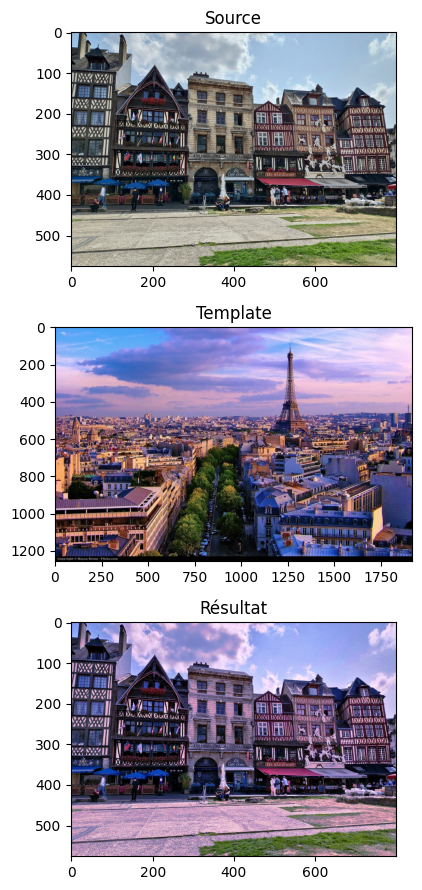

In [29]:
# Chargement des images source et référence, et conversion en RGB
src = cv2.cvtColor(cv2.imread("rouen.jpg"),cv2.COLOR_BGR2RGB)
ref = cv2.cvtColor(cv2.imread("paris.jpg"),cv2.COLOR_BGR2RGB)

# Matching d'histogrammes de source vers référence
matched = histogram_match(src, ref)

# Affichage des images source, référence et résultat
plt.subplots(3,1,figsize=(10,9))

plt.subplot(311)
plt.imshow(src)
plt.title("Source")

plt.subplot(312)
plt.imshow(ref)
plt.title("Template")

plt.subplot(313)
plt.imshow(matched)
plt.title("Résultat")

plt.tight_layout()

plt.show()

Un dernier code, cette fois pour afficher les histogrammes de chaque canal R,G,B des images source, référence et résultat.

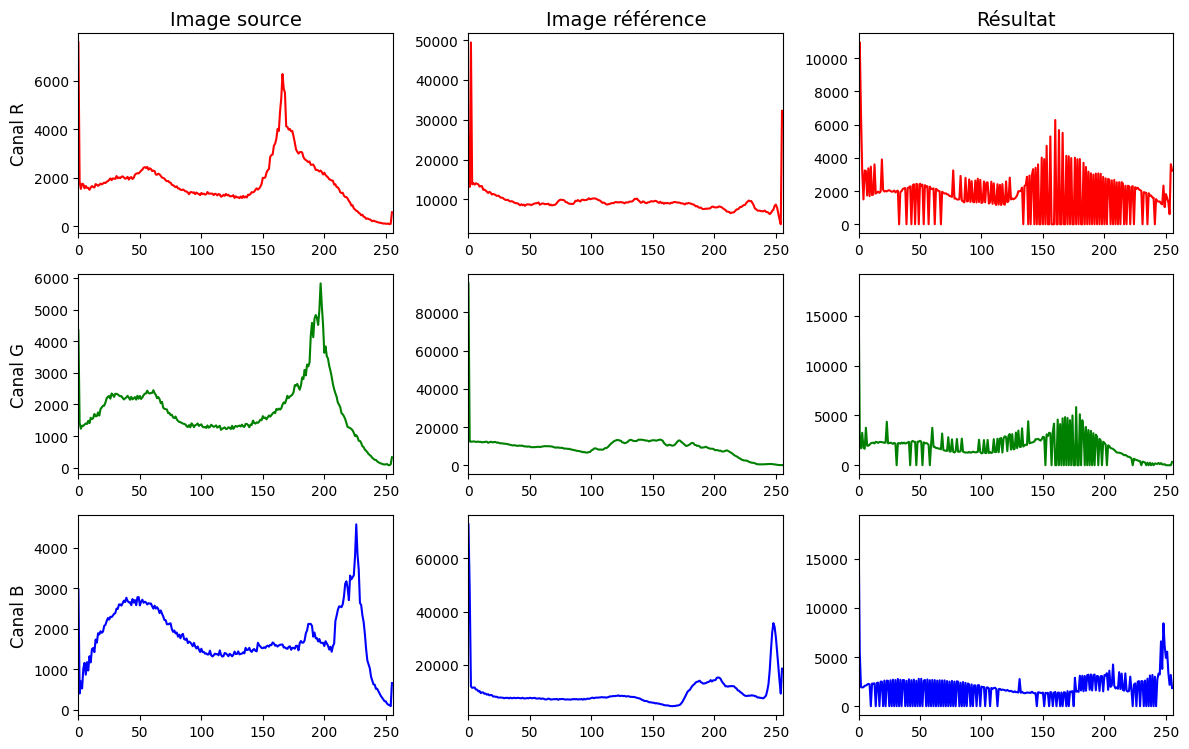

In [30]:
# Affichage des histogrammes des canaux RGB des images source, référence et résultat
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

colors = ["red", "green", "blue"]
channel_names = ["R", "G", "B"]
titles = ["Image source", "Image référence", "Résultat"]
for col, img in enumerate([src,ref,matched]):

    # Histogramme par canal
    for row, (color, cname) in enumerate(zip(colors, channel_names)):
        channel = img[..., row]
        hist, bins = np.histogram(channel.ravel(), bins=256, range=(0, 256))

        ax = axes[row, col]
        ax.plot(hist, color=color)
        ax.set_xlim([0, 256])
        if col == 0:
            ax.set_ylabel(f"Canal {cname}", fontsize=12)

    if titles is not None:
        axes[0, col].set_title(titles[col], fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()